In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [2]:
df1 = pd.read_csv('C:/Users/Rog Strix/Downloads/2022DA04050/training_dataset/Ball.csv')
df1.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [3]:
df2 = pd.read_csv('C:/Users/Rog Strix/Downloads/2022DA04050/training_dataset/Result.csv')
df2.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [4]:
df3 = pd.merge(df1,df2,left_on='ID',right_on='ID',how='outer')

In [5]:
def get_bowling_team(row):
    if row['TossWinner'] == row['BattingTeam']:
        # if the team that won the toss is batting first, the other team will bowl first
        return row['Team2']
    else:
        # if the team that won the toss is bowling first, the other team will bat first
        return row['Team1']

# apply the function to each row of the DataFrame to create a new column called "bowling_team"
df3['bowling_team'] = df3.apply(get_bowling_team, axis=1)

In [6]:
df = df3.copy()

In [7]:
df_sum_first_six_overs = df[df["overs"] <= 6].groupby(["ID", "innings","Venue","BattingTeam","bowling_team","MatchNumber"])["total_run"].sum().reset_index()

# rename the column containing the sum of runs
df_sum_first_six_overs = df_sum_first_six_overs.rename(columns={"runs": "sum_first_six_overs"})

In [8]:
df_sum_first_six_overs.rename(columns = {'total_run':'total_runs'}, inplace = True)

In [9]:
df4 = pd.DataFrame(df_sum_first_six_overs)

In [10]:
df4

,ID,innings,Venue,BattingTeam,bowling_team,MatchNumber,total_runs
0,335982,1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,68
1,335982,2,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,1,33
2,335983,1,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,Chennai Super Kings,2,62
3,335983,2,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Kings XI Punjab,2,69
4,335984,1,Feroz Shah Kotla,Rajasthan Royals,Rajasthan Royals,3,44
...,...,...,...,...,...,...,...
1923,1312198,2,"Eden Gardens, Kolkata",Lucknow Super Giants,Lucknow Super Giants,Eliminator,67
1924,1312199,1,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bangalore,Royal Challengers Bangalore,Qualifier 2,52
1925,1312199,2,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,Rajasthan Royals,Qualifier 2,77
1926,1312200,1,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,Gujarat Titans,Final,54


In [11]:
def remove_brackets(x):
    return x.strip('[]')

df['Team1Players'] = df['Team1Players'].apply(remove_brackets)
# create Team1players_num series
for i in df["Team1Players"]:
    i = list[i]

df['Team2Players'] = df['Team2Players'].apply(remove_brackets)
# create Team1players_num series
for i in df["Team2Players"]:
    i = list[i]

df['Team1Players'] = df['Team1Players'].apply(lambda x: [y.replace("'", "") for y in x.split(", ")])
df['Team2Players'] = df['Team2Players'].apply(lambda x: [y.replace("'", "") for y in x.split(", ")])

In [12]:
df['Team1Players'] = df['Team1Players'].apply(tuple)
df['Team2Players'] = df['Team2Players'].apply(tuple)

# select only the desired columns and create a new DataFrame
new_df = df.loc[:, ['ID', 'Team1Players', 'Team2Players', 'MatchNumber', 'innings','Venue']]

# drop duplicates from the new DataFrame
new_df.drop_duplicates(inplace=True)

# reset the index of the new DataFrame
new_df.reset_index(drop=True, inplace=True)

# print the new DataFrame
print(new_df)


           ID                                       Team1Players  \
0     1312200  (YBK Jaiswal, JC Buttler, SV Samson, D Padikka...   
1     1312200  (YBK Jaiswal, JC Buttler, SV Samson, D Padikka...   
2     1312199  (V Kohli, F du Plessis, RM Patidar, GJ Maxwell...   
3     1312199  (V Kohli, F du Plessis, RM Patidar, GJ Maxwell...   
4     1312198  (V Kohli, F du Plessis, RM Patidar, GJ Maxwell...   
...       ...                                                ...   
1923   335984  (G Gambhir, V Sehwag, S Dhawan, MK Tiwary, KD ...   
1924   335983  (K Goel, JR Hopes, KC Sangakkara, Yuvraj Singh...   
1925   335983  (K Goel, JR Hopes, KC Sangakkara, Yuvraj Singh...   
1926   335982  (R Dravid, W Jaffer, V Kohli, JH Kallis, CL Wh...   
1927   335982  (R Dravid, W Jaffer, V Kohli, JH Kallis, CL Wh...   

                                           Team2Players  MatchNumber  innings  \
0     (WP Saha, Shubman Gill, MS Wade, HH Pandya, DA...        Final        1   
1     (WP Saha, Shubm

In [13]:
df8 = pd.DataFrame(new_df)

In [14]:
df8

,ID,Team1Players,Team2Players,MatchNumber,innings,Venue
0,1312200,"(YBK Jaiswal, JC Buttler, SV Samson, D Padikka...","(WP Saha, Shubman Gill, MS Wade, HH Pandya, DA...",Final,1,"Narendra Modi Stadium, Ahmedabad"
1,1312200,"(YBK Jaiswal, JC Buttler, SV Samson, D Padikka...","(WP Saha, Shubman Gill, MS Wade, HH Pandya, DA...",Final,2,"Narendra Modi Stadium, Ahmedabad"
2,1312199,"(V Kohli, F du Plessis, RM Patidar, GJ Maxwell...","(YBK Jaiswal, JC Buttler, SV Samson, D Padikka...",Qualifier 2,1,"Narendra Modi Stadium, Ahmedabad"
3,1312199,"(V Kohli, F du Plessis, RM Patidar, GJ Maxwell...","(YBK Jaiswal, JC Buttler, SV Samson, D Padikka...",Qualifier 2,2,"Narendra Modi Stadium, Ahmedabad"
4,1312198,"(V Kohli, F du Plessis, RM Patidar, GJ Maxwell...","(Q de Kock, KL Rahul, M Vohra, DJ Hooda, MP St...",Eliminator,1,"Eden Gardens, Kolkata"
...,...,...,...,...,...,...
1923,335984,"(G Gambhir, V Sehwag, S Dhawan, MK Tiwary, KD ...","(T Kohli, YK Pathan, SR Watson, M Kaif, DS Leh...",3,2,Feroz Shah Kotla
1924,335983,"(K Goel, JR Hopes, KC Sangakkara, Yuvraj Singh...","(PA Patel, ML Hayden, MEK Hussey, MS Dhoni, SK...",2,1,"Punjab Cricket Association Stadium, Mohali"
1925,335983,"(K Goel, JR Hopes, KC Sangakkara, Yuvraj Singh...","(PA Patel, ML Hayden, MEK Hussey, MS Dhoni, SK...",2,2,"Punjab Cricket Association Stadium, Mohali"
1926,335982,"(R Dravid, W Jaffer, V Kohli, JH Kallis, CL Wh...","(SC Ganguly, BB McCullum, RT Ponting, DJ Husse...",1,1,M Chinnaswamy Stadium


In [15]:
new_ipl1 = pd.merge(df8, df4,  how='outer', left_on=['ID','MatchNumber','innings','Venue'], right_on = ['ID','MatchNumber','innings','Venue'])

In [16]:
df5 = new_ipl1.copy()

In [17]:
df5.columns

Index(['ID', 'Team1Players', 'Team2Players', 'MatchNumber', 'innings', 'Venue',
       'BattingTeam', 'bowling_team', 'total_runs'],
      dtype='object')

In [18]:
team_name_mapping = {
    'Deccan Chargers': 'Sunrisers Hyderabad',
    'Delhi Daredevils': 'Delhi Capitals',
    'Kings XI Punjab': 'Punjab Kings',
    'Rising Pune Supergiants' : 'Chennai Super Kings',
    'Rising Pune Supergiant' : 'Chennai Super Kings' ,
    'Gujarat Lions' : 'Rajasthan Royals'
}

In [19]:
df5['BattingTeam'].replace(team_name_mapping, inplace=True)
df5['bowling_team'].replace(team_name_mapping, inplace=True)

# Drop Pune Warrior Team details as no franchize brought that team 
df5 = df5[(df5['BattingTeam'] != 'Pune Warriors') & (df5['bowling_team'] != 'Pune Warriors')]
df5 = df5[(df5['BattingTeam'] != 'Kochi Tuskers Kerala') & (df5['bowling_team'] != 'Kochi Tuskers Kerala')]

In [20]:
data = {'Venue': ['Narendra Modi Stadium', 'MA Chidambaram Stadium', 'Arun Jaitley Stadium', 'M.Chinnaswamy Stadium', 'Wankhede Stadium', 'Dr DY Patil Sports Academy', 'Punjab Cricket Association IS Bindra Stadium', 'Sawai Mansingh Stadium', 'Rajiv Gandhi International Stadium', 'Eden Gardens', 'Maharashtra Cricket Association Stadium', 'Brabourne Stadium']}
df_Venues = pd.DataFrame(data)

# Making the Venue list to match with given 2023 Venue list
df5['Venue'] = df5["Venue"].str.split(', ', expand=True)[0]

# Select data of those match with 2023 Venue details
df5 = df5[df5['Venue'].isin(df_Venues['Venue'])]

In [21]:
venue_dict = {}
index = 0

for team in df5['Venue']:
    if team not in venue_dict:
        venue_dict[team] = index
        index += 1

print(venue_dict)

{'Narendra Modi Stadium': 0, 'Eden Gardens': 1, 'Wankhede Stadium': 2, 'Brabourne Stadium': 3, 'Dr DY Patil Sports Academy': 4, 'Maharashtra Cricket Association Stadium': 5, 'Arun Jaitley Stadium': 6, 'MA Chidambaram Stadium': 7, 'Rajiv Gandhi International Stadium': 8, 'Punjab Cricket Association IS Bindra Stadium': 9, 'M.Chinnaswamy Stadium': 10, 'Sawai Mansingh Stadium': 11}


In [22]:
team1_dict = {}
index = 0

for team in df5['BattingTeam']:
    if team not in team1_dict:
        team1_dict[team] = index
        index += 1

print(team1_dict)

{'Rajasthan Royals': 0, 'Gujarat Titans': 1, 'Royal Challengers Bangalore': 2, 'Lucknow Super Giants': 3, 'Sunrisers Hyderabad': 4, 'Punjab Kings': 5, 'Delhi Capitals': 6, 'Mumbai Indians': 7, 'Chennai Super Kings': 8, 'Kolkata Knight Riders': 9}


In [23]:
team2_dict = {}
index = 0

for team in df5['bowling_team']:
    if team not in team2_dict:
        team2_dict[team] = index
        index += 1

print(team2_dict)

{'Gujarat Titans': 0, 'Rajasthan Royals': 1, 'Royal Challengers Bangalore': 2, 'Lucknow Super Giants': 3, 'Punjab Kings': 4, 'Sunrisers Hyderabad': 5, 'Delhi Capitals': 6, 'Mumbai Indians': 7, 'Chennai Super Kings': 8, 'Kolkata Knight Riders': 9}


In [24]:
df5['venue_ids'] = df5['Venue'].apply(lambda x: venue_dict[x])

In [25]:
df5['team1_ids'] = df5['BattingTeam'].apply(lambda x: team1_dict[x])

In [26]:
df5['team2_ids'] = df5['bowling_team'].apply(lambda x: team2_dict[x])

In [27]:
df5.drop(['MatchNumber','Venue','BattingTeam', 'bowling_team'], axis=1 , inplace = True)

In [28]:
df5.rename(columns={'venue_ids': 'Venue','team1_ids': 'batting_team', 'team2_ids' : 'bowling_team'}, inplace=True)

In [29]:
df5 = df5[['Venue','innings','batting_team','bowling_team','Team1Players', 'Team2Players','total_runs']]

In [30]:
df5.head()

,Venue,innings,batting_team,bowling_team,Team1Players,Team2Players,total_runs
0,0,1,0,0,"(YBK Jaiswal, JC Buttler, SV Samson, D Padikka...","(WP Saha, Shubman Gill, MS Wade, HH Pandya, DA...",54
1,0,2,1,1,"(YBK Jaiswal, JC Buttler, SV Samson, D Padikka...","(WP Saha, Shubman Gill, MS Wade, HH Pandya, DA...",35
2,0,1,2,2,"(V Kohli, F du Plessis, RM Patidar, GJ Maxwell...","(YBK Jaiswal, JC Buttler, SV Samson, D Padikka...",52
3,0,2,0,1,"(V Kohli, F du Plessis, RM Patidar, GJ Maxwell...","(YBK Jaiswal, JC Buttler, SV Samson, D Padikka...",77
4,1,1,2,2,"(V Kohli, F du Plessis, RM Patidar, GJ Maxwell...","(Q de Kock, KL Rahul, M Vohra, DJ Hooda, MP St...",60


In [31]:
unique_players1 = df5['Team1Players'].explode().unique().tolist()
unique_players2 = df5['Team2Players'].explode().unique().tolist()

unique_players = list(set(unique_players1 + unique_players2))

In [32]:
unique_players

['DNT Zoysa',
 'Sachin Baby',
 'MP Stoinis',
 'AP Dole',
 'N Pooran',
 'OF Smith',
 'Ankit Soni',
 'P Dogra',
 'MA Agarwal',
 'JJ Bumrah',
 'VVS Laxman',
 'B Sai Sudharsan',
 'MK Pandey',
 'S Chanderpaul',
 'SC Kuggeleijn',
 'SM Curran',
 'Rasikh Salam',
 'S Sreesanth',
 'A Mishra',
 'Y Nagar',
 'Umar Gul',
 'DA Miller',
 'DJ Bravo',
 'Mandeep Singh',
 'M Shahrukh Khan',
 'AJ Turner',
 'MC Juneja',
 'JPR Scantlebury-Searles',
 'AG Paunikar',
 'AR Bawne',
 'S Nadeem',
 'A Nortje',
 'B Akhil',
 'A Kumble',
 'Anureet Singh',
 'RV Pawar',
 'CJ Dala',
 'SO Hetmyer',
 'A Ashish Reddy',
 'J Theron',
 'PSP Handscomb',
 'SJ Srivastava',
 'BB Samantray',
 'M Morkel',
 'NK Patel',
 'D Salunkhe',
 'AA Chavan',
 'SL Malinga',
 'BB Sran',
 'Anmolpreet Singh',
 'C de Grandhomme',
 'B Indrajith',
 'TS Mills',
 'BCJ Cutting',
 'KD Karthik',
 'SW Billings',
 'K Gowtham',
 'PA Reddy',
 'D Padikkal',
 'MF Maharoof',
 'D Wiese',
 'AN Ahmed',
 'D Brevis',
 'DE Bollinger',
 'RT Ponting',
 'AS Roy',
 'SB Styr

In [33]:
for name in unique_players:
    df5[name] = df5.apply(lambda row: 1 if name in row['Team1Players'] or name in row['Team2Players'] else 0, axis=1)

In [34]:
df5.drop(['Team1Players','Team2Players'], axis=1 , inplace = True)

In [35]:
df5.head()

,Venue,innings,batting_team,bowling_team,total_runs,DNT Zoysa,Sachin Baby,MP Stoinis,AP Dole,N Pooran,...,KC Cariappa,SD Chitnis,DM Bravo,Sandeep Sharma,KAJ Roach,FA Allen,CR Brathwaite,S Narwal,Salman Butt,R Ashwin
0,0,1,0,0,54,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,2,1,1,35,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,1,2,2,52,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,2,0,1,77,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,1,2,2,60,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
features = df5.drop(['total_runs'], axis=1)
target = df5['total_runs']

In [37]:
acc = []
model = []

In [38]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

In [39]:
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(Xtrain, Ytrain)
y_pred=classifier.predict(Xtest)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, Ytest)
print('Decision Tree Model accuracy score: {0:0.4f}'.format(accuracy_score(Ytest, y_pred)))

Decision Tree Model accuracy score: 0.0099


In [40]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)
predicted_values = RF.predict(Xtest)
from sklearn.metrics import accuracy_score
x = accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)
from sklearn.metrics import classification_report
print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.024630541871921183
              precision    recall  f1-score   support

           7       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          20       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         1
          27       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         0
          30       0.00      0.00      0.00         1
          31       0.00      0.00      0.00         0
          32       0.00      0.00      0.00         1
          33       0.00      0.00      0.00         1
          34       0.00      0.00      0.00         3
          35       0.00      0.00      0.00         4
          36       0.00      0.00      0.00         1
          37       0.00      0.00      0.00         5
          38       0.00      0.00      0.00         8
          39       0.00      0.00      0.

C:\Users\Rog Strix\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rog Strix\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rog Strix\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rog Strix\anaconda3\lib\site-packages\skle

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr.fit(Xtrain, Ytrain)

# make predictions on the testing set
y_pred = lr.predict(Xtest)

# evaluate the model by calculating the root mean squared error (RMSE)
rmse = mean_squared_error(Ytest, y_pred, squared=False)

print(f"RMSE: {rmse}")

RMSE: 31.897952362185627


In [42]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm = SVC()
svm.fit(Xtrain, Ytrain)

# make predictions on the testing set
y_pred = svm.predict(Xtest)

# evaluate the model by calculating the accuracy
accuracy = accuracy_score(Ytest, y_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 0.014778325123152709


In [43]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

gb = GradientBoostingRegressor()
gb.fit(Xtrain, Ytrain)

# make predictions on the testing set
y_pred = gb.predict(Xtest)

# evaluate the model by calculating the mean squared error
mse = mean_squared_error(Ytest, y_pred)

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 163.3462499088171


In [44]:
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.linear_model import BayesianRidge
import xgboost as xgb

In [45]:
svr = SVR()
svr.fit(Xtrain, Ytrain)
y_pred = svr.predict(Xtest)
mse = mean_squared_error(Ytest, y_pred)
print(f"SVR Mean Squared Error: {mse}")

SVR Mean Squared Error: 178.96308070437175


In [46]:
bayesian = BayesianRidge()
bayesian.fit(Xtrain, Ytrain)
y_pred = bayesian.predict(Xtest)
mse = mean_squared_error(Ytest, y_pred)
print(f"Bayesian Regression Mean Squared Error: {mse}")

Bayesian Regression Mean Squared Error: 179.07394291552848


In [47]:
dtrain = xgb.DMatrix(Xtrain, label=Ytrain)
dtest = xgb.DMatrix(Xtest, label=Ytest)
params = {
    "objective": "reg:squarederror",
    "learning_rate": 0.5,
    "max_depth": 2,
    "min_child_weight": 3,
    "gamma": 100.0
}
xgb_model = xgb.train(params, dtrain)
y_pred = xgb_model.predict(dtest)
mse = mean_squared_error(Ytest, y_pred)
print(f"XGBoost Mean Squared Error: {mse}")

XGBoost Mean Squared Error: 162.98827268228766


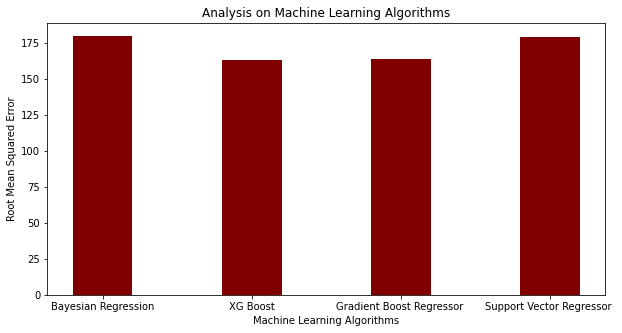

In [48]:
import numpy as np
import matplotlib.pyplot as plt 

 
# creating the dataset
data = {'Bayesian Regression': 179.74, 'XG Boost': 162.99, 'Gradient Boost Regressor ': 163.70, 
        'Support Vector Regressor ':178.96}
Machine_Learning_Algorithms = list(data.keys())
Root_Mean_Squared_Error = list(data.values())
 
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(Machine_Learning_Algorithms, Root_Mean_Squared_Error, color ='maroon', 
        width = 0.4)

plt.xlabel("Machine Learning Algorithms")
plt.ylabel("Root Mean Squared Error")
plt.title("Analysis on Machine Learning Algorithms")
plt.show()

In [49]:
df11 = pd.DataFrame(columns=df5.columns)

In [50]:
df11

,Venue,innings,batting_team,bowling_team,total_runs,DNT Zoysa,Sachin Baby,MP Stoinis,AP Dole,N Pooran,...,KC Cariappa,SD Chitnis,DM Bravo,Sandeep Sharma,KAJ Roach,FA Allen,CR Brathwaite,S Narwal,Salman Butt,R Ashwin


In [51]:
df10 = pd.read_csv('C:/Users/Rog Strix/Downloads/2022DA04050/training_dataset/test_file.csv')

In [52]:
df10

,venue,innings,batting_team,bowling_team,batsmen,bowlers
0,Narendra Modi Stadium,1,Gujarat Titans,Rajasthan Royals,"WP Saha, Shubman Gill, MS Wade","TA Boult, Sandeep Sharma, A Zampa"
1,Narendra Modi Stadium,2,Rajasthan Royals,Gujarat Titans,"YBK Jaiswal, SV Samson","HH Pandya, Mohammed Shami"


In [53]:
df10['venue_ids'] = df10['venue'].apply(lambda x: venue_dict[x])

In [54]:
df10['batting_team_ids'] = df10['batting_team'].apply(lambda x: team1_dict[x])

In [55]:
df10['bowling_team_ids'] = df10['bowling_team'].apply(lambda x: team2_dict[x])

In [56]:
unique_players1 = df10['batsmen'].explode().unique().tolist()
unique_players2 = df10['bowlers'].explode().unique().tolist()

unique_players_test = list(set(unique_players1 + unique_players2))

In [57]:
unique_players_test

['WP Saha, Shubman Gill, MS Wade',
 'HH Pandya, Mohammed Shami',
 'TA Boult, Sandeep Sharma, A Zampa',
 'YBK Jaiswal, SV Samson']

In [58]:
unique_players = []
for team_players in df10[['batsmen', 'bowlers']].values:
    for player in team_players:
        unique_players.extend([p.strip() for p in player.split(',')])
unique_players = list(set(unique_players))

In [59]:
unique_players

['YBK Jaiswal',
 'Mohammed Shami',
 'Sandeep Sharma',
 'SV Samson',
 'TA Boult',
 'A Zampa',
 'WP Saha',
 'Shubman Gill',
 'MS Wade',
 'HH Pandya']

In [60]:
for name in unique_players:
    df10[name] = df10.apply(lambda row: 1 if name in row['batsmen'] or name in row['bowlers'] else 0, axis=1)

In [61]:
df10.drop(['batsmen','bowlers','venue','batting_team','bowling_team'], axis=1 , inplace = True)

In [62]:
df10.head()

,innings,venue_ids,batting_team_ids,bowling_team_ids,YBK Jaiswal,Mohammed Shami,Sandeep Sharma,SV Samson,TA Boult,A Zampa,WP Saha,Shubman Gill,MS Wade,HH Pandya
0,1,0,1,1,0,0,1,0,1,1,1,1,1,0
1,2,0,0,0,1,1,0,1,0,0,0,0,0,1


In [63]:
df10.rename(columns={'venue_ids': 'Venue','batting_team_ids': 'batting_team', 'bowling_team_ids' : 'bowling_team'}, inplace=True)

In [64]:
for col in df10.columns:
    if col not in df11.columns:
        df11[col] = 0

In [65]:
df_combined = pd.concat([df11, df10], axis=0)

In [66]:
df_combined.fillna(0, inplace=True)

In [67]:
df_combined.drop('total_runs', axis=1, inplace=True)

In [68]:
y_pred=RF.predict(df_combined)

In [69]:
y_pred

array([54, 54], dtype=int64)